In [1]:
import itertools as it

from matplotlib import pyplot as plt
from nbmetalog import nbmetalog as nbm
import numpy as np
import pandas as pd
import seaborn as sns
from teeplot import teeplot as tp


In [2]:
# prints metadata about notebook runtime
nbm.print_metadata()


context: ci
hostname: ab930a85d210
interpreter: 3.8.12 (default, Jan 15 2022, 18:39:47)  [GCC 7.5.0]
nbcellexec: 2
nbname: spatial-nuissance-phylometrics
nbpath: /opt/hstrat-evolutionary-inference/binder/spatial-nuissance-phylometrics.ipynb
revision: null
session: 01f02ae1-876a-42c4-b901-1b3a28a51800
timestamp: 2023-03-13T11:53:30Z00:00


IPython==7.16.1
keyname==0.5.2
yaml==6.0
matplotlib==3.5.3
nbmetalog==0.2.6
numpy==1.21.6
pandas==1.3.5
seaborn==0.12.2
teeplot==0.2.0
re==2.2.1
ipython_genutils==0.2.0
logging==0.5.1.2
zmq==22.0.3
json==2.0.9
six==1.16.0
ipykernel==5.5.3


In [3]:
df = pd.read_csv("https://osf.io/5trmg/download")
dfdigest = np.bitwise_xor.reduce(
    pd.util.hash_pandas_object(df),
)
print("{:x}".format(dfdigest))
df


40f23b7946d11896


,a,epoch,mut_distn,num_generations,num_islands,num_niches,p_island_migration,p_niche_invasion,population_size,replicate,...,variance_pairwise_distance,variance_pairwise_distance_branch_only,mrca_depth,sackin_index,mean_evolutionary_distinctiveness,sum_evolutionary_distinctiveness,variance_evolutionary_distinctiveness,resolution,subsampling-fraction,trie-postprocess
0,collapsed-phylogeny,7,np.random.standard_normal,32768,1024,4,0.01,3.051758e-06,32768,4,...,27.305316,27.305316,1,570110,81.707306,2.677385e+06,1030.406615,NaN,NaN,NaN
1,collapsed-phylogeny,7,np.random.standard_normal,32768,1024,4,0.01,3.051758e-06,32768,41,...,26.027820,26.027820,0,548025,83.217377,2.726867e+06,1170.361609,NaN,NaN,NaN
2,collapsed-phylogeny,7,np.random.standard_normal,32768,1024,4,0.01,3.051758e-06,32768,47,...,27.705938,27.705938,0,559117,86.538544,2.835695e+06,1284.142442,NaN,NaN,NaN
3,collapsed-phylogeny,7,np.random.standard_normal,32768,1024,4,0.01,3.051758e-06,32768,15,...,28.664163,28.664163,1,583153,76.277557,2.499463e+06,1545.456043,NaN,NaN,NaN
4,collapsed-phylogeny,7,np.random.standard_normal,32768,1024,4,0.01,3.051758e-06,32768,19,...,27.416625,27.416625,0,583519,75.600433,2.477275e+06,1027.817652,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104994,reconstructed-tree,2,np.random.standard_normal,32768,1,4,0.01,3.051758e-08,32768,10,...,24.562416,24.562416,1,3305,99.163609,3.242650e+04,282.320163,30.0,0.01,naive
104995,reconstructed-tree,2,np.random.standard_normal,32768,1,4,0.01,3.051758e-08,32768,16,...,17.300466,17.300466,0,2923,1893.146789,6.190590e+05,250803.885040,100.0,0.01,rollback
104996,reconstructed-tree,2,np.random.standard_normal,32768,1,4,0.01,3.051758e-08,32768,1,...,88.702783,88.702783,1,717008,5.744125,1.882235e+05,6.163179,100.0,1.00,rollback
104997,reconstructed-tree,2,np.random.standard_normal,32768,1,4,0.01,3.051758e-08,32768,10,...,25.685331,25.685331,0,516453,28.659882,9.391270e+05,116.954707,3.0,1.00,naive


In [4]:
phylometrics = [
    #     'diversity',
    "colless_like_index",
    #     'average_depth',
    #     'average_origin_time',
    #     'average_origin_time_normalized',
    #     'max_depth',
    "mean_pairwise_distance",
    #     'mean_pairwise_distance_branch_only',
    #     'num_active',
    "num_ancestors",
    #     'num_outside',
    #     'num_roots',
    #     'num_taxa',
    #     'phylogenetic_diversity',
    #     'sum_pairwise_distance',
    #     'sum_pairwise_distance_branch_only',
    #     'total_orgs',
    #     'tree_size',
    #     'variance_pairwise_distance',
    #     'variance_pairwise_distance_branch_only',
    #     'mrca_depth',
    #     'sackin_index',
    "mean_evolutionary_distinctiveness",
    #     'sum_evolutionary_distinctiveness',
    #     'variance_evolutionary_distinctiveness',
]


In [5]:
methodological_variables = [
    "resolution",
]


In [6]:
evolutionary_variables = [
    "num_niches",
]


In [7]:
sensitivity_analysis_variables = [
    "epoch",
    "mut_distn",
]


In [8]:
fixed_variables = [
    "num_generations",  # homogeneous (num generations per epoch)
    "p_island_migration",  # homogeneous
    "population_size",  # homogeneous
    "subsampling-fraction",  # only use 1.0
    "trie-postprocess",  # just use naive postprocessing for now
    "tournament_size",  # only use 2
    "num_islands",  # only use 1024
]


In [9]:
# ensure fixed variables
df = df[
    (df["p_island_migration"] == 0.01)
    & (df["tournament_size"] == 2)
    & (df["num_islands"] == 1024)
    & ((df["subsampling-fraction"] == 1.0) | df["subsampling-fraction"].isna())
    & ((df["trie-postprocess"] == "naive") | df["trie-postprocess"].isna())
].copy()

for fixed_variable in fixed_variables:
    assert len(df[fixed_variable].dropna().unique()) == 1, excluded_variable

df


,a,epoch,mut_distn,num_generations,num_islands,num_niches,p_island_migration,p_niche_invasion,population_size,replicate,...,variance_pairwise_distance,variance_pairwise_distance_branch_only,mrca_depth,sackin_index,mean_evolutionary_distinctiveness,sum_evolutionary_distinctiveness,variance_evolutionary_distinctiveness,resolution,subsampling-fraction,trie-postprocess
0,collapsed-phylogeny,7,np.random.standard_normal,32768,1024,4,0.01,3.051758e-06,32768,4,...,27.305316,27.305316,1,570110,81.707306,2677385.0,1030.406615,NaN,NaN,NaN
1,collapsed-phylogeny,7,np.random.standard_normal,32768,1024,4,0.01,3.051758e-06,32768,41,...,26.027820,26.027820,0,548025,83.217377,2726867.0,1170.361609,NaN,NaN,NaN
2,collapsed-phylogeny,7,np.random.standard_normal,32768,1024,4,0.01,3.051758e-06,32768,47,...,27.705938,27.705938,0,559117,86.538544,2835695.0,1284.142442,NaN,NaN,NaN
3,collapsed-phylogeny,7,np.random.standard_normal,32768,1024,4,0.01,3.051758e-06,32768,15,...,28.664163,28.664163,1,583153,76.277557,2499463.0,1545.456043,NaN,NaN,NaN
4,collapsed-phylogeny,7,np.random.standard_normal,32768,1024,4,0.01,3.051758e-06,32768,19,...,27.416625,27.416625,0,583519,75.600433,2477275.0,1027.817652,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101360,reconstructed-tree,7,np.random.exponential,32768,1024,8,0.01,3.051758e-08,32768,38,...,14.274736,14.274736,0,449491,313.221619,10263646.0,16111.276187,3.0,1.0,naive
101376,reconstructed-tree,7,np.random.exponential,32768,1024,8,0.01,3.051758e-08,32768,14,...,17.255838,17.255838,0,470110,336.758774,11034911.5,27108.474690,30.0,1.0,naive
101377,reconstructed-tree,7,np.random.exponential,32768,1024,8,0.01,3.051758e-08,32768,39,...,17.573834,17.573834,0,486074,309.332581,10136210.0,22480.165720,100.0,1.0,naive
101381,reconstructed-tree,7,np.random.exponential,32768,1024,8,0.01,3.051758e-08,32768,38,...,19.851903,19.851903,0,497072,305.019302,9994872.5,14447.708552,10.0,1.0,naive


In [10]:
# exclude extraneous variable values
df = df[(df["a"] != "consolidated-phylogeny")].copy()

df


,a,epoch,mut_distn,num_generations,num_islands,num_niches,p_island_migration,p_niche_invasion,population_size,replicate,...,variance_pairwise_distance,variance_pairwise_distance_branch_only,mrca_depth,sackin_index,mean_evolutionary_distinctiveness,sum_evolutionary_distinctiveness,variance_evolutionary_distinctiveness,resolution,subsampling-fraction,trie-postprocess
0,collapsed-phylogeny,7,np.random.standard_normal,32768,1024,4,0.01,3.051758e-06,32768,4,...,27.305316,27.305316,1,570110,81.707306,2677385.0,1030.406615,NaN,NaN,NaN
1,collapsed-phylogeny,7,np.random.standard_normal,32768,1024,4,0.01,3.051758e-06,32768,41,...,26.027820,26.027820,0,548025,83.217377,2726867.0,1170.361609,NaN,NaN,NaN
2,collapsed-phylogeny,7,np.random.standard_normal,32768,1024,4,0.01,3.051758e-06,32768,47,...,27.705938,27.705938,0,559117,86.538544,2835695.0,1284.142442,NaN,NaN,NaN
3,collapsed-phylogeny,7,np.random.standard_normal,32768,1024,4,0.01,3.051758e-06,32768,15,...,28.664163,28.664163,1,583153,76.277557,2499463.0,1545.456043,NaN,NaN,NaN
4,collapsed-phylogeny,7,np.random.standard_normal,32768,1024,4,0.01,3.051758e-06,32768,19,...,27.416625,27.416625,0,583519,75.600433,2477275.0,1027.817652,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101360,reconstructed-tree,7,np.random.exponential,32768,1024,8,0.01,3.051758e-08,32768,38,...,14.274736,14.274736,0,449491,313.221619,10263646.0,16111.276187,3.0,1.0,naive
101376,reconstructed-tree,7,np.random.exponential,32768,1024,8,0.01,3.051758e-08,32768,14,...,17.255838,17.255838,0,470110,336.758774,11034911.5,27108.474690,30.0,1.0,naive
101377,reconstructed-tree,7,np.random.exponential,32768,1024,8,0.01,3.051758e-08,32768,39,...,17.573834,17.573834,0,486074,309.332581,10136210.0,22480.165720,100.0,1.0,naive
101381,reconstructed-tree,7,np.random.exponential,32768,1024,8,0.01,3.051758e-08,32768,38,...,19.851903,19.851903,0,497072,305.019302,9994872.5,14447.708552,10.0,1.0,naive


In [11]:
df["num_niches"].unique()


array([4, 1, 8])

In [12]:
df["num_islands"].unique()


array([1024])

In [13]:
df["tournament_size"].unique()


array([2])

In [14]:
df["a"].unique()


array(['collapsed-phylogeny', 'reconstructed-tree'], dtype=object)

In [15]:
df["regime"] = df.apply(
    lambda row: {
        (1024, 1, 3.0517578125e-08): "plain",
        (1024, 4, 3.0517578125e-08): "4 niche ecology",
        (1024, 4, 3.0517578125e-06): "weak 4 niche ecology",
        (1024, 8, 3.0517578125e-08): "8 niche ecology",
    }.get(
        tuple(row[["num_islands", "num_niches", "p_niche_invasion"]]),
        np.nan,  # default
    ),
    axis="columns",
)
df["regime"].unique()


array(['weak 4 niche ecology', '4 niche ecology', 'plain',
       '8 niche ecology'], dtype=object)

In [16]:
df[df["a"] == "collapsed-phylogeny"]["regime"].unique()


array(['weak 4 niche ecology', '4 niche ecology', 'plain',
       '8 niche ecology'], dtype=object)

# perfect phylogenetic data


In [17]:
melted_df = df[(df["a"] == "collapsed-phylogeny")].melt(
    id_vars=evolutionary_variables
    + methodological_variables
    + sensitivity_analysis_variables
    + ["regime"],
    value_vars=phylometrics,
)
melted_df["phylometric"] = melted_df["variable"]
melted_df


,num_niches,resolution,epoch,mut_distn,regime,variable,value,phylometric
0,4,NaN,7,np.random.standard_normal,weak 4 niche ecology,colless_like_index,245694.126217,colless_like_index
1,4,NaN,7,np.random.standard_normal,weak 4 niche ecology,colless_like_index,229733.780163,colless_like_index
2,4,NaN,7,np.random.standard_normal,weak 4 niche ecology,colless_like_index,233461.802088,colless_like_index
3,4,NaN,7,np.random.standard_normal,weak 4 niche ecology,colless_like_index,262782.396217,colless_like_index
4,4,NaN,7,np.random.standard_normal,weak 4 niche ecology,colless_like_index,260748.492189,colless_like_index
...,...,...,...,...,...,...,...,...
4791,4,NaN,2,np.random.exponential,weak 4 niche ecology,mean_evolutionary_distinctiveness,62.567078,mean_evolutionary_distinctiveness
4792,4,NaN,2,np.random.exponential,weak 4 niche ecology,mean_evolutionary_distinctiveness,54.291748,mean_evolutionary_distinctiveness
4793,4,NaN,2,np.random.exponential,weak 4 niche ecology,mean_evolutionary_distinctiveness,61.928589,mean_evolutionary_distinctiveness
4794,4,NaN,2,np.random.exponential,weak 4 niche ecology,mean_evolutionary_distinctiveness,65.404114,mean_evolutionary_distinctiveness


teeplots/col=phylometric+epoch=0+mut_distn=np.random.exponential+nuisance=spatial-structure+viz=barplot+x=value+y=regime+ext=.pdf
teeplots/col=phylometric+epoch=0+mut_distn=np.random.exponential+nuisance=spatial-structure+viz=barplot+x=value+y=regime+ext=.png
teeplots/col=phylometric+epoch=0+mut_distn=np.random.standard_normal+nuisance=spatial-structure+viz=barplot+x=value+y=regime+ext=.pdf
teeplots/col=phylometric+epoch=0+mut_distn=np.random.standard_normal+nuisance=spatial-structure+viz=barplot+x=value+y=regime+ext=.png
teeplots/col=phylometric+epoch=2+mut_distn=np.random.exponential+nuisance=spatial-structure+viz=barplot+x=value+y=regime+ext=.pdf
teeplots/col=phylometric+epoch=2+mut_distn=np.random.exponential+nuisance=spatial-structure+viz=barplot+x=value+y=regime+ext=.png
teeplots/col=phylometric+epoch=2+mut_distn=np.random.standard_normal+nuisance=spatial-structure+viz=barplot+x=value+y=regime+ext=.pdf
teeplots/col=phylometric+epoch=2+mut_distn=np.random.standard_normal+nuisance=

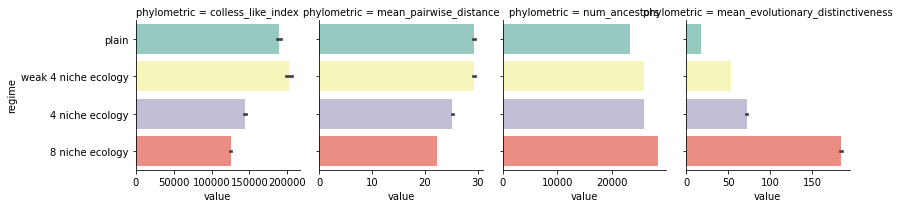

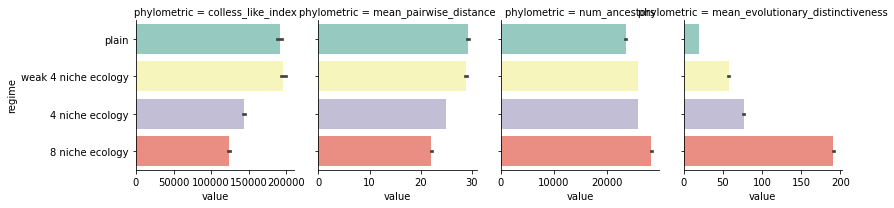

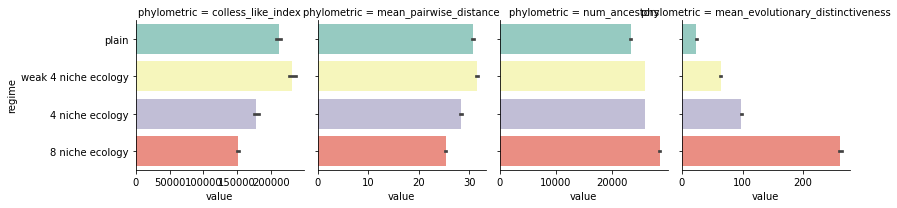

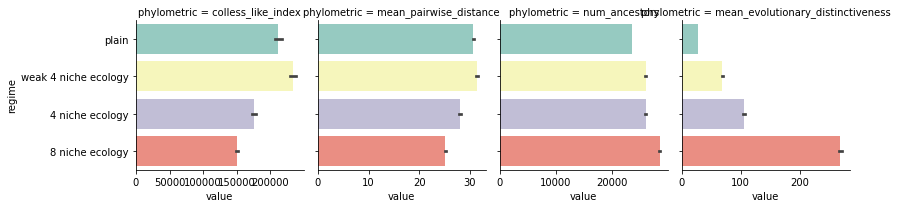

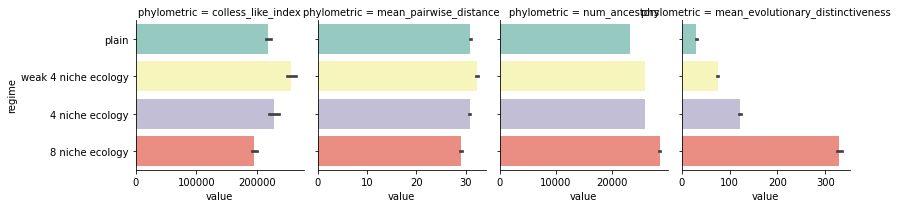

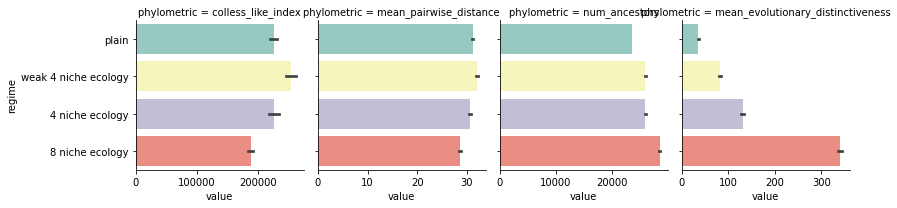

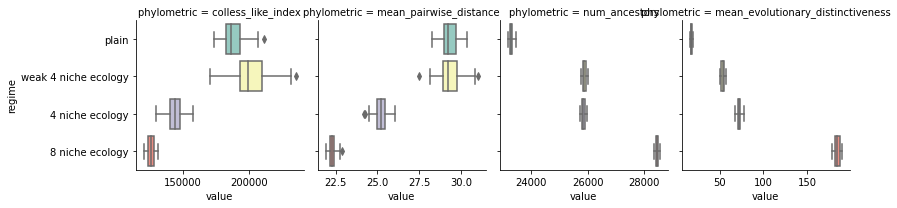

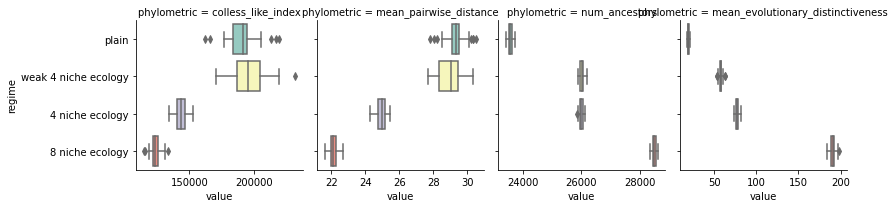

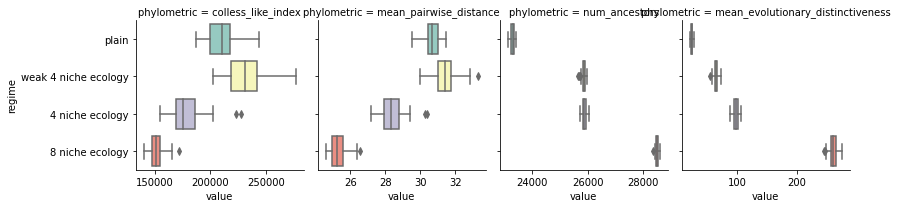

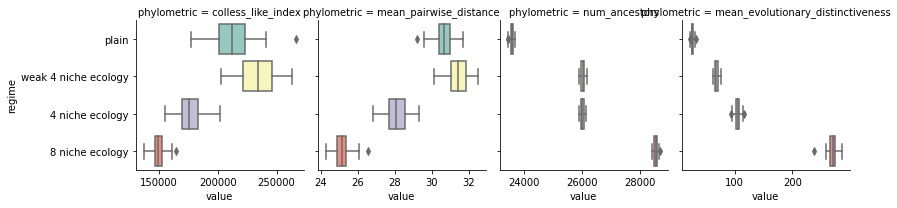

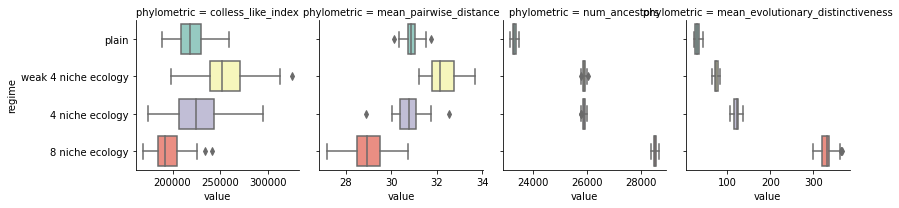

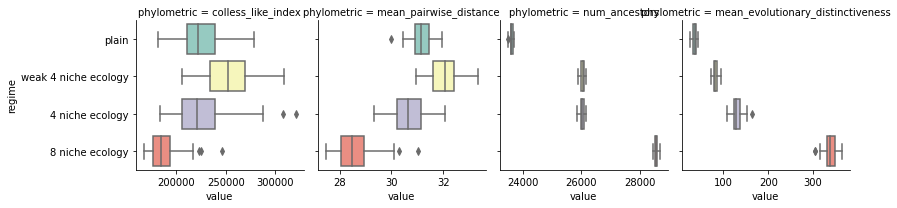

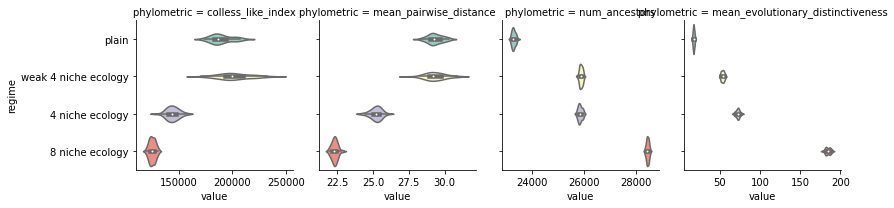

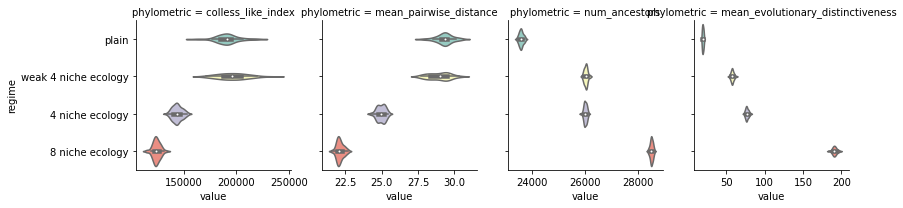

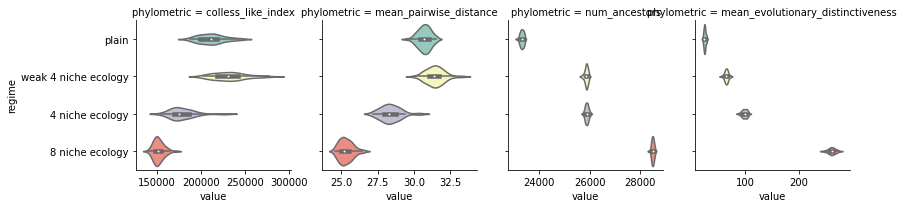

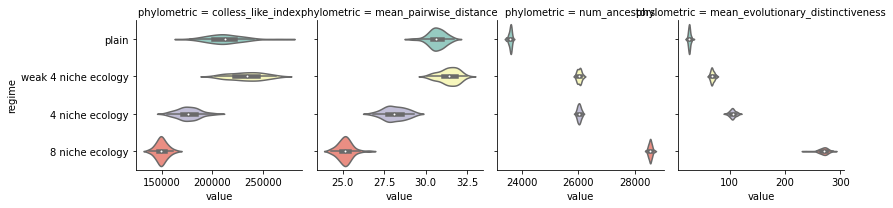

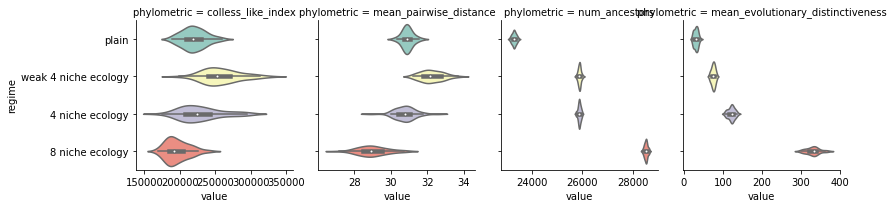

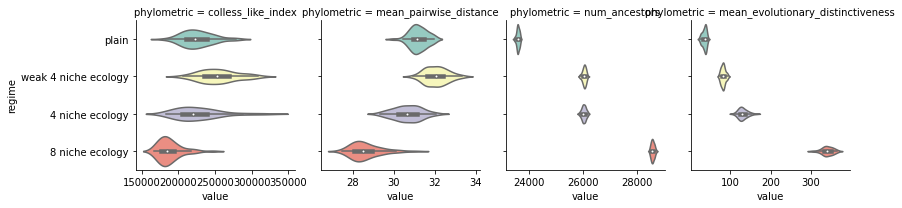

In [18]:
def make_do_plot(plotter):
    def do_plot(data, col, x, y):
        g = sns.FacetGrid(
            data,
            col=col,
            sharex=False,
        )
        g.map(
            plotter,
            x,
            y,
            order=[
                "plain",
                "weak 4 niche ecology",
                "4 niche ecology",
                "8 niche ecology",
            ],
            palette=sns.color_palette("Set3", 4),
        )

    return do_plot


for viz, (group, group_df) in it.product(
    [
        sns.barplot,
        sns.boxplot,
        sns.violinplot,
    ],
    melted_df.groupby(sensitivity_analysis_variables),
):
    do_plot = make_do_plot(viz)
    do_plot.__name__ = viz.__name__
    tp.tee(
        do_plot,
        data=group_df,
        col="phylometric",
        x="value",
        y="regime",
        teeplot_outattrs={
            **{
                "nuisance": "spatial-structure",
            },
            **dict(
                zip(sensitivity_analysis_variables, group),
            ),
        },
    )


# reconstructed phylogenetic data


In [19]:
df["quality"] = df.apply(
    lambda row: {
        ("reconstructed-tree", 3.0): "33% resolution",
        ("reconstructed-tree", 10.0): "10% resolution",
        ("reconstructed-tree", 30.0): "3% resolution",
        ("reconstructed-tree", 100.0): "1% resolution",
        ("collapsed-phylogeny", 0): "perfect resolution",
    }.get(
        tuple(row[["a", "resolution"]].fillna(0)),
        np.nan,  # default
    ),
    axis="columns",
)
df["quality"].unique()


array(['perfect resolution', '10% resolution', '1% resolution',
       '3% resolution', '33% resolution'], dtype=object)

In [20]:
melted_df = df.melt(
    id_vars=evolutionary_variables
    + methodological_variables
    + sensitivity_analysis_variables
    + ["regime", "a", "quality"],
    value_vars=phylometrics,
)
melted_df["phylometric"] = melted_df["variable"]
melted_df


,num_niches,resolution,epoch,mut_distn,regime,a,quality,variable,value,phylometric
0,4,NaN,7,np.random.standard_normal,weak 4 niche ecology,collapsed-phylogeny,perfect resolution,colless_like_index,245694.126217,colless_like_index
1,4,NaN,7,np.random.standard_normal,weak 4 niche ecology,collapsed-phylogeny,perfect resolution,colless_like_index,229733.780163,colless_like_index
2,4,NaN,7,np.random.standard_normal,weak 4 niche ecology,collapsed-phylogeny,perfect resolution,colless_like_index,233461.802088,colless_like_index
3,4,NaN,7,np.random.standard_normal,weak 4 niche ecology,collapsed-phylogeny,perfect resolution,colless_like_index,262782.396217,colless_like_index
4,4,NaN,7,np.random.standard_normal,weak 4 niche ecology,collapsed-phylogeny,perfect resolution,colless_like_index,260748.492189,colless_like_index
...,...,...,...,...,...,...,...,...,...,...
23991,8,3.0,7,np.random.exponential,8 niche ecology,reconstructed-tree,33% resolution,mean_evolutionary_distinctiveness,313.221619,mean_evolutionary_distinctiveness
23992,8,30.0,7,np.random.exponential,8 niche ecology,reconstructed-tree,3% resolution,mean_evolutionary_distinctiveness,336.758774,mean_evolutionary_distinctiveness
23993,8,100.0,7,np.random.exponential,8 niche ecology,reconstructed-tree,1% resolution,mean_evolutionary_distinctiveness,309.332581,mean_evolutionary_distinctiveness
23994,8,10.0,7,np.random.exponential,8 niche ecology,reconstructed-tree,10% resolution,mean_evolutionary_distinctiveness,305.019302,mean_evolutionary_distinctiveness


teeplots/col=phylometric+epoch=0+mut_distn=np.random.exponential+nuisance=spatial-structure+row=regime+viz=barplot+x=value+y=quality+ext=.pdf
teeplots/col=phylometric+epoch=0+mut_distn=np.random.exponential+nuisance=spatial-structure+row=regime+viz=barplot+x=value+y=quality+ext=.png
teeplots/col=phylometric+epoch=0+mut_distn=np.random.standard_normal+nuisance=spatial-structure+row=regime+viz=barplot+x=value+y=quality+ext=.pdf
teeplots/col=phylometric+epoch=0+mut_distn=np.random.standard_normal+nuisance=spatial-structure+row=regime+viz=barplot+x=value+y=quality+ext=.png
teeplots/col=phylometric+epoch=2+mut_distn=np.random.exponential+nuisance=spatial-structure+row=regime+viz=barplot+x=value+y=quality+ext=.pdf
teeplots/col=phylometric+epoch=2+mut_distn=np.random.exponential+nuisance=spatial-structure+row=regime+viz=barplot+x=value+y=quality+ext=.png
teeplots/col=phylometric+epoch=2+mut_distn=np.random.standard_normal+nuisance=spatial-structure+row=regime+viz=barplot+x=value+y=quality+ext

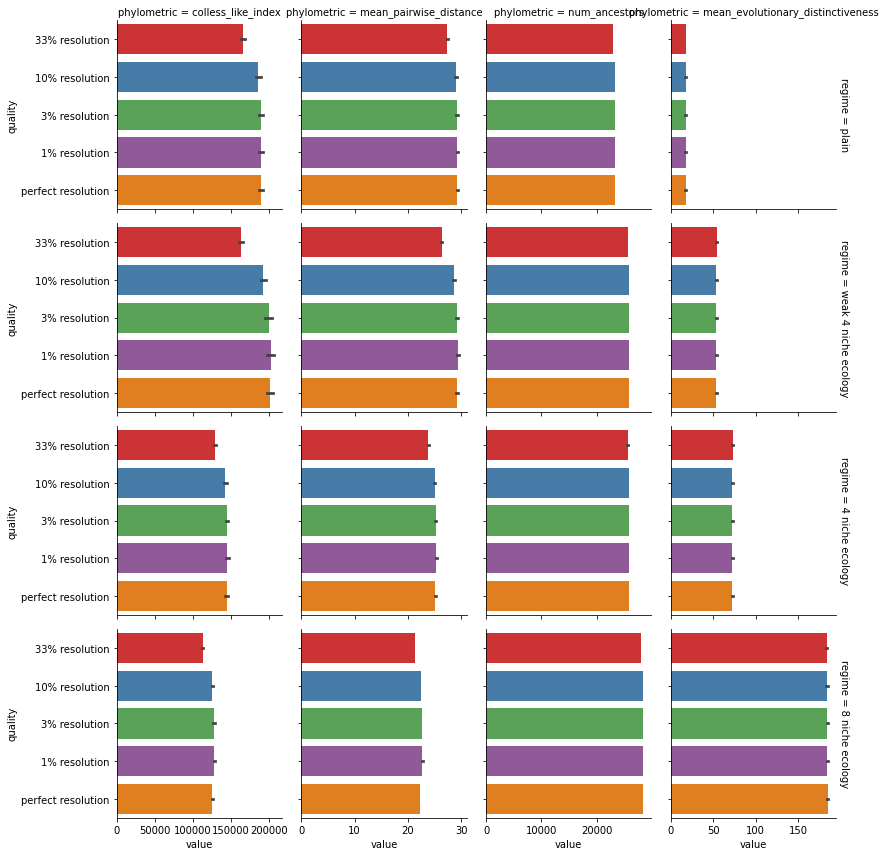

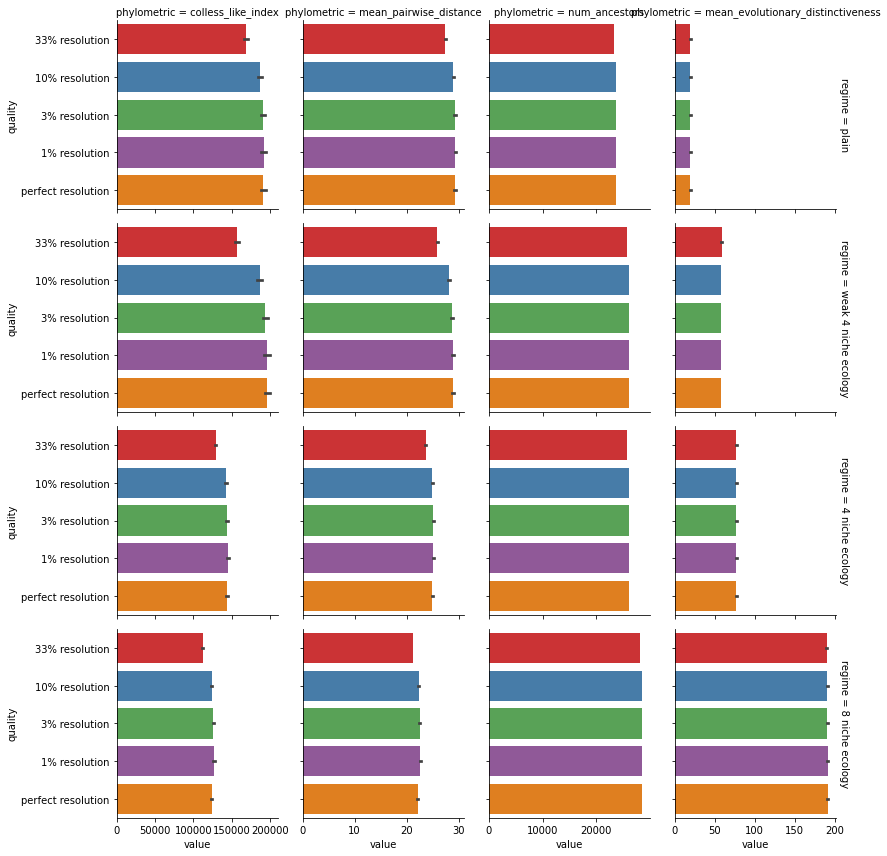

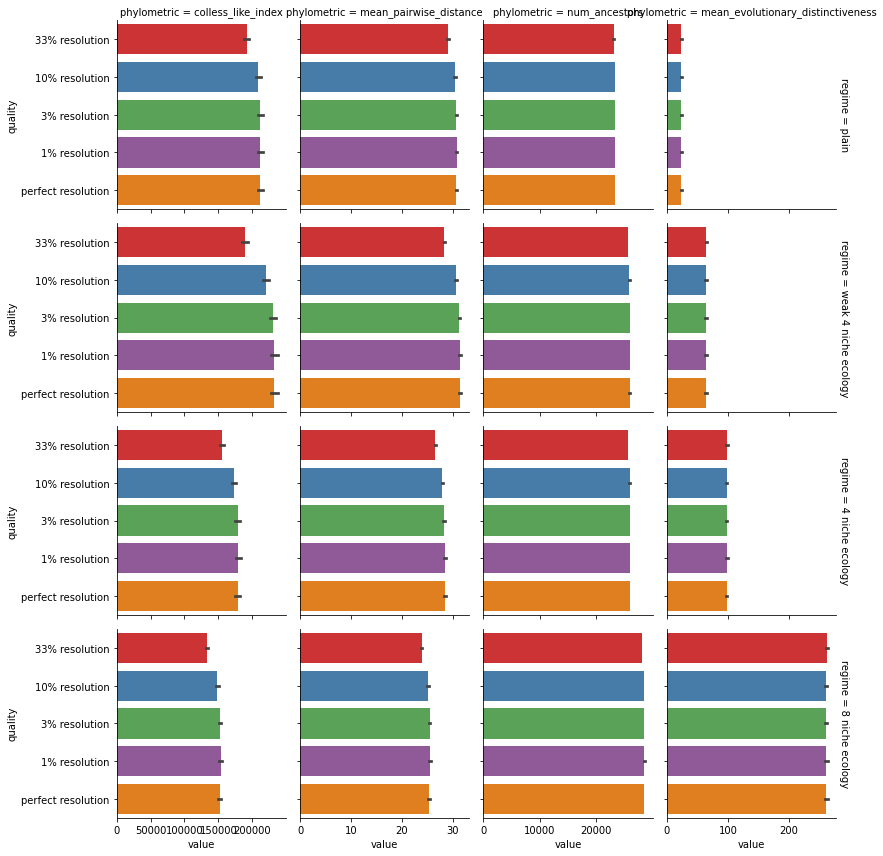

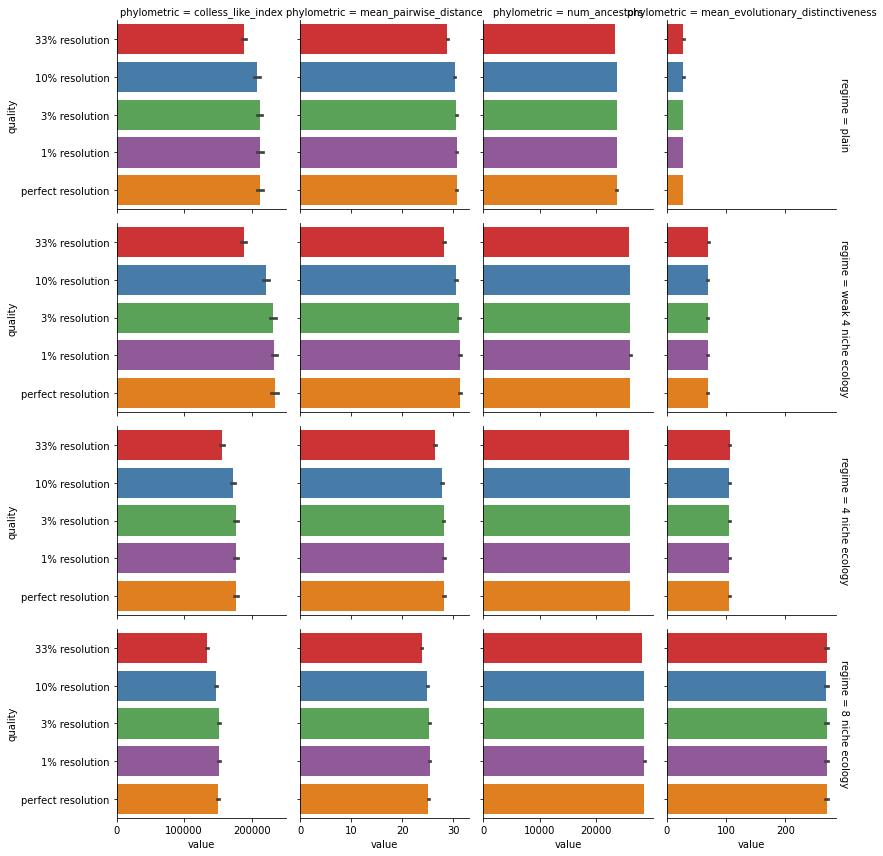

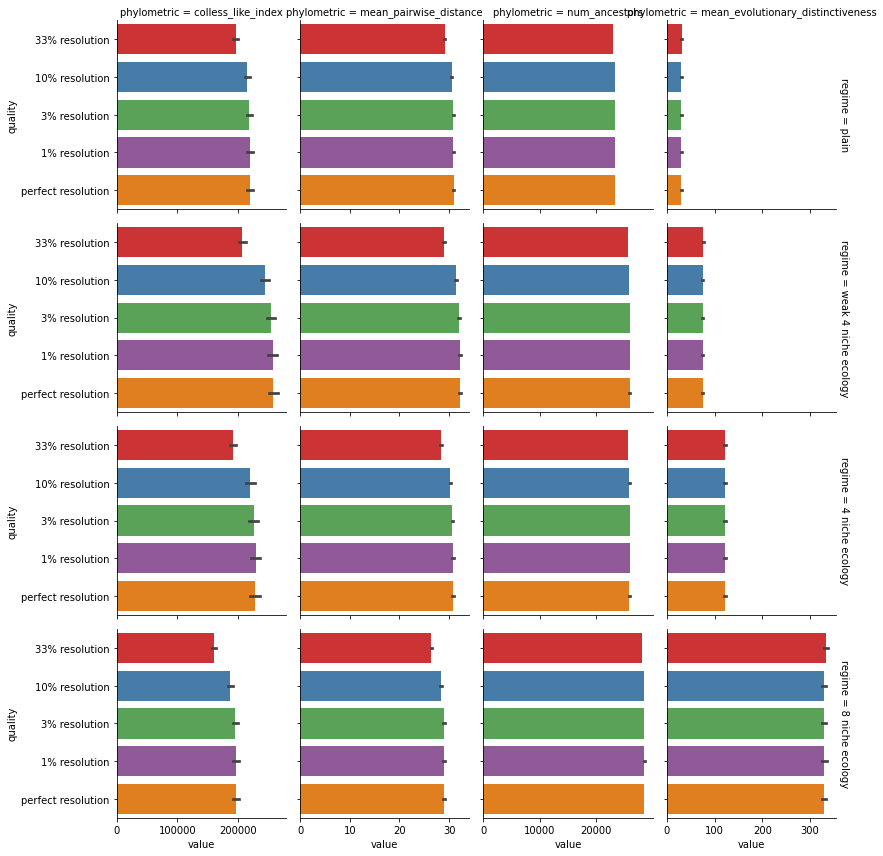

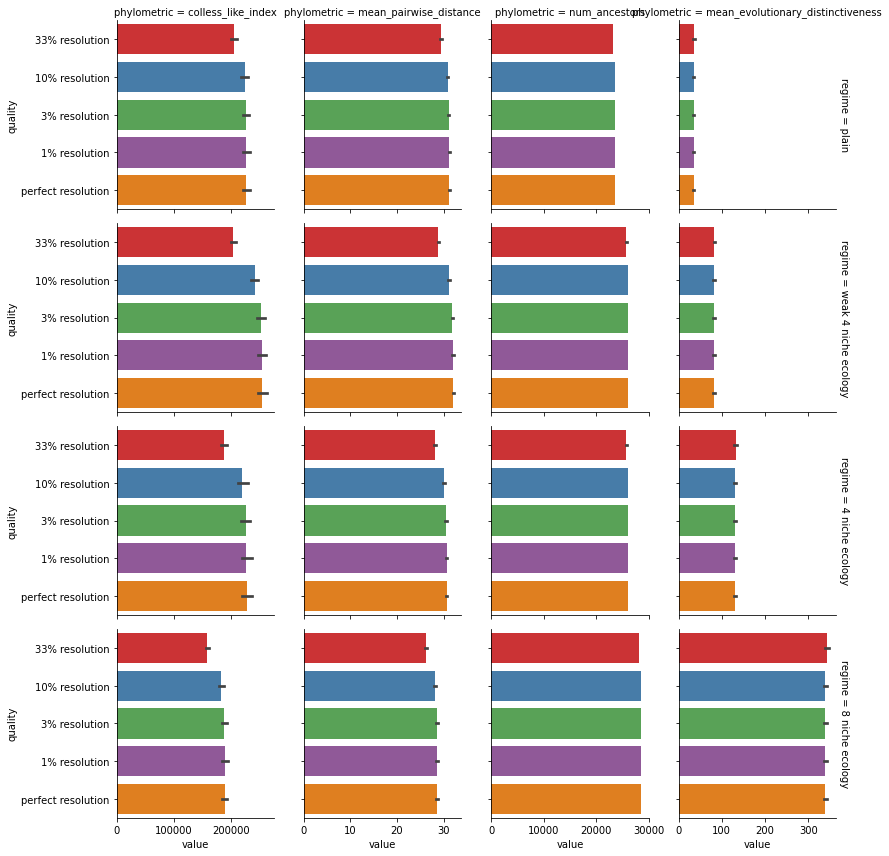

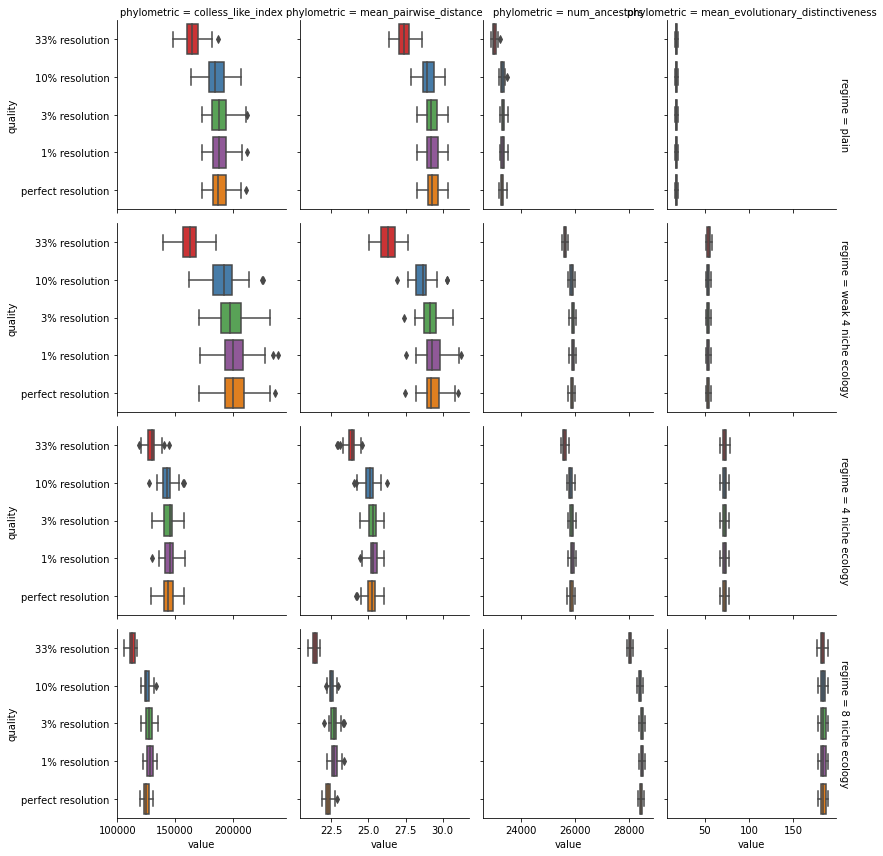

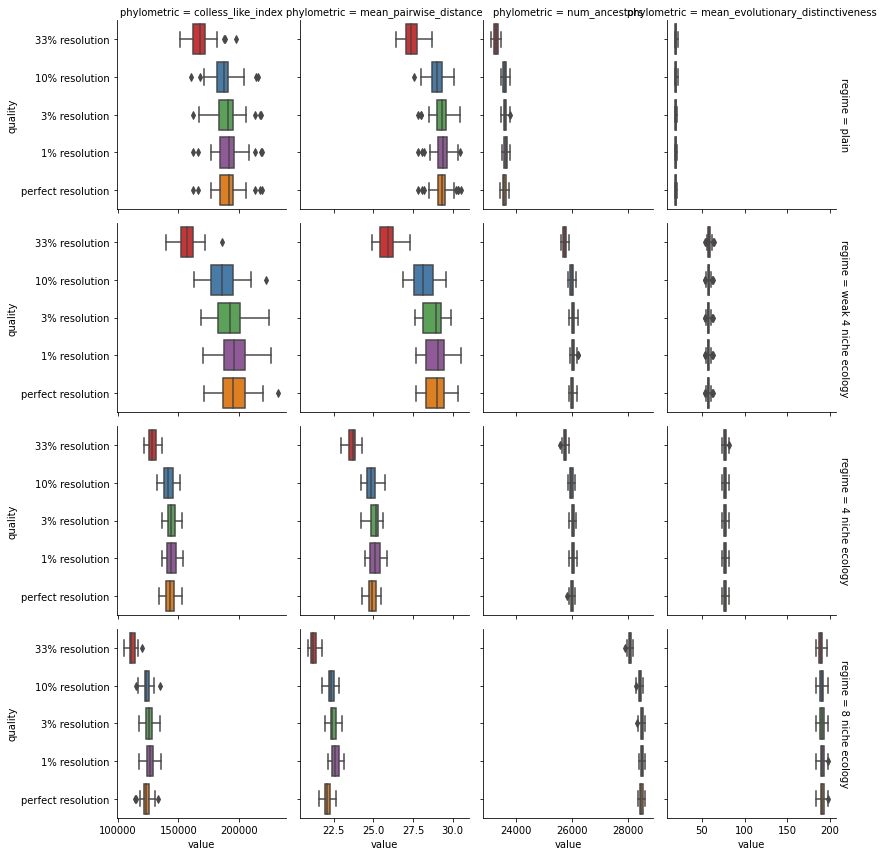

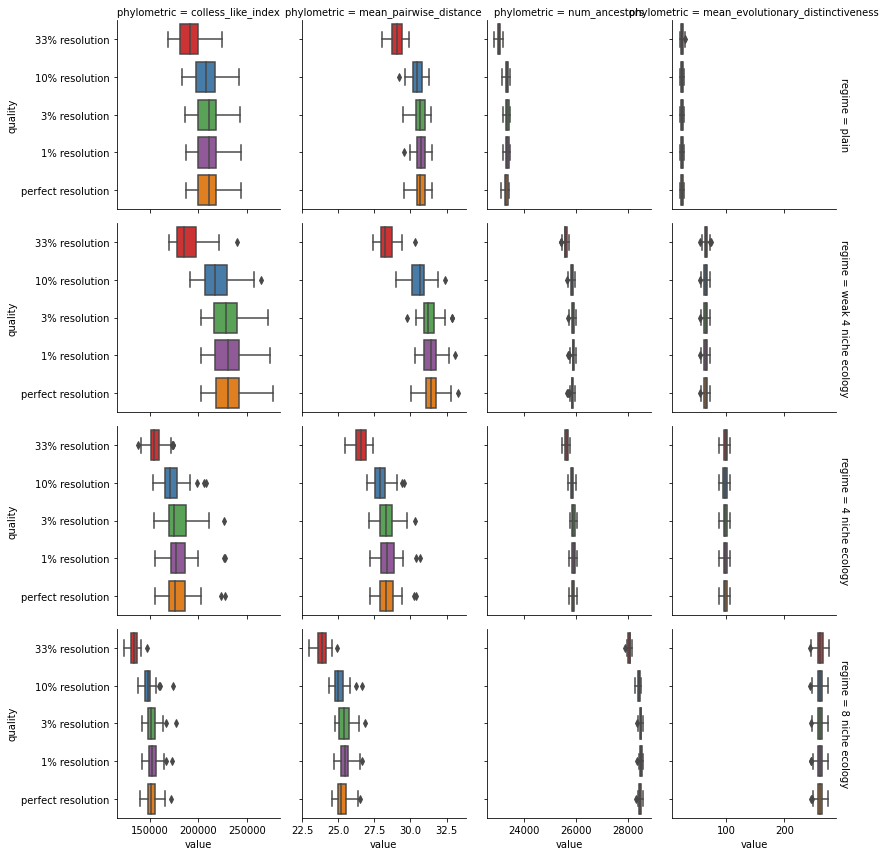

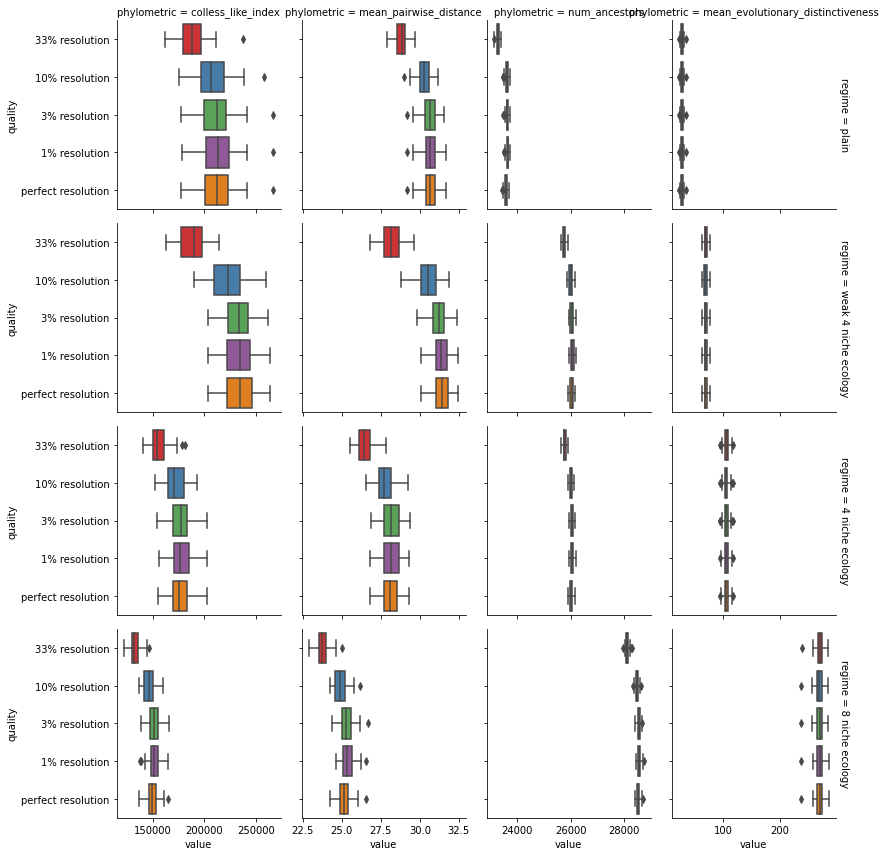

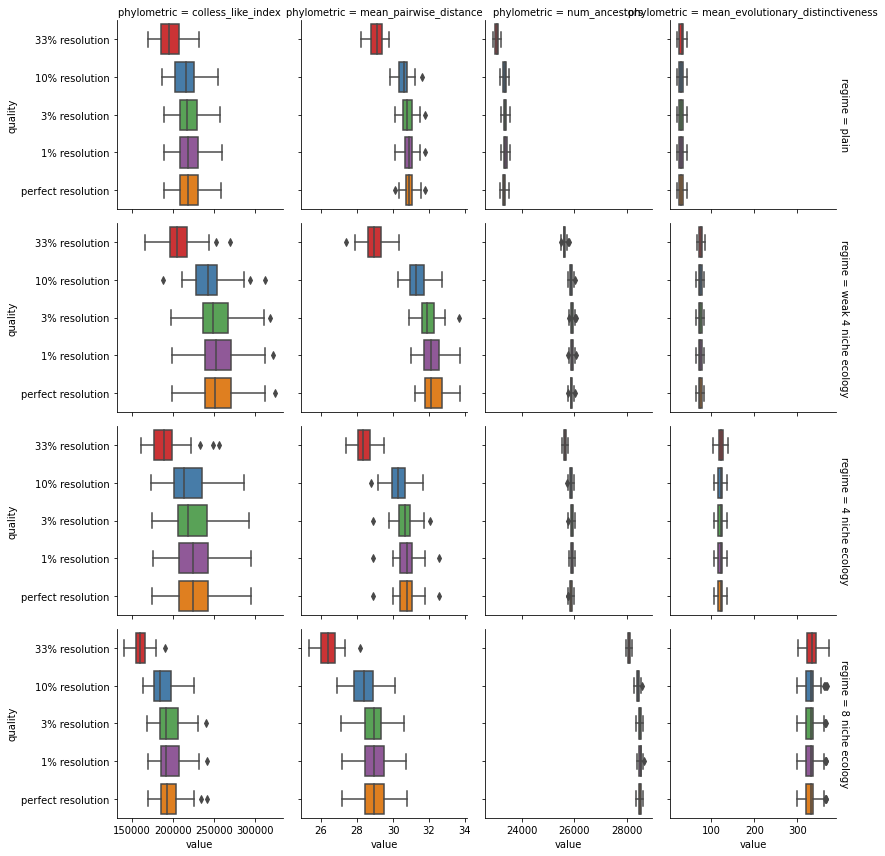

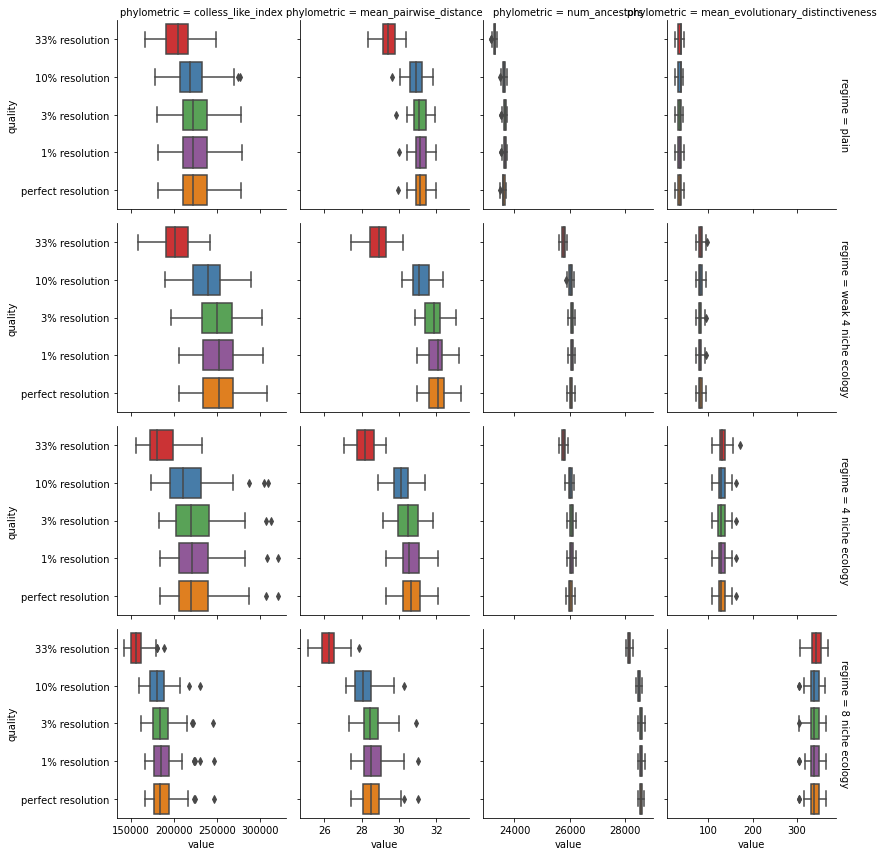

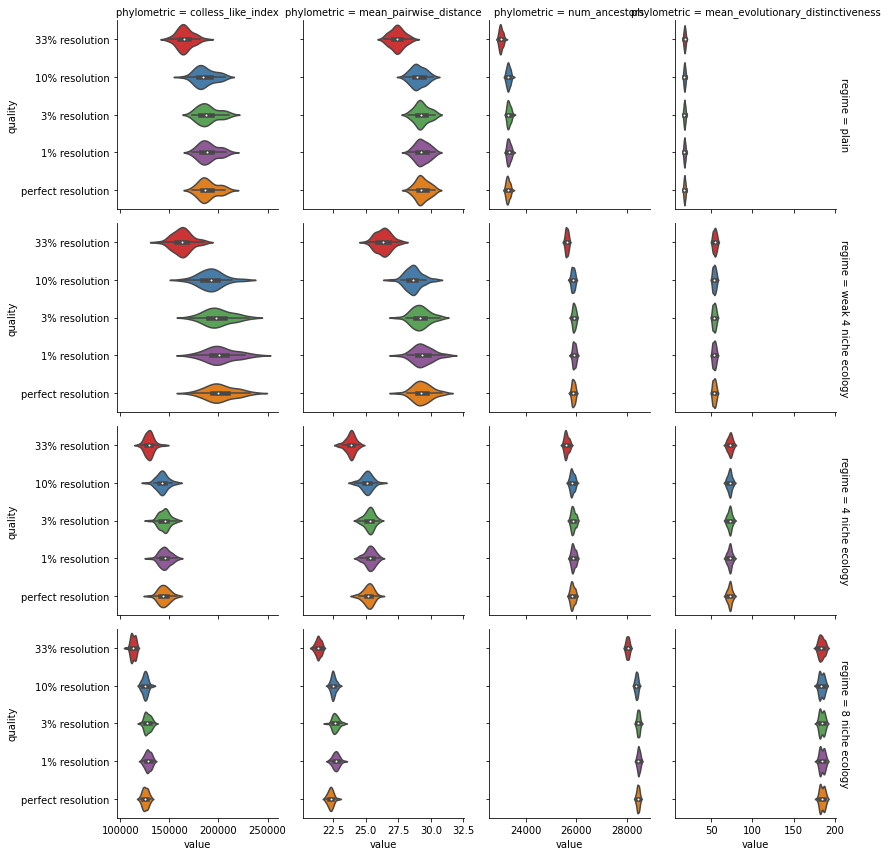

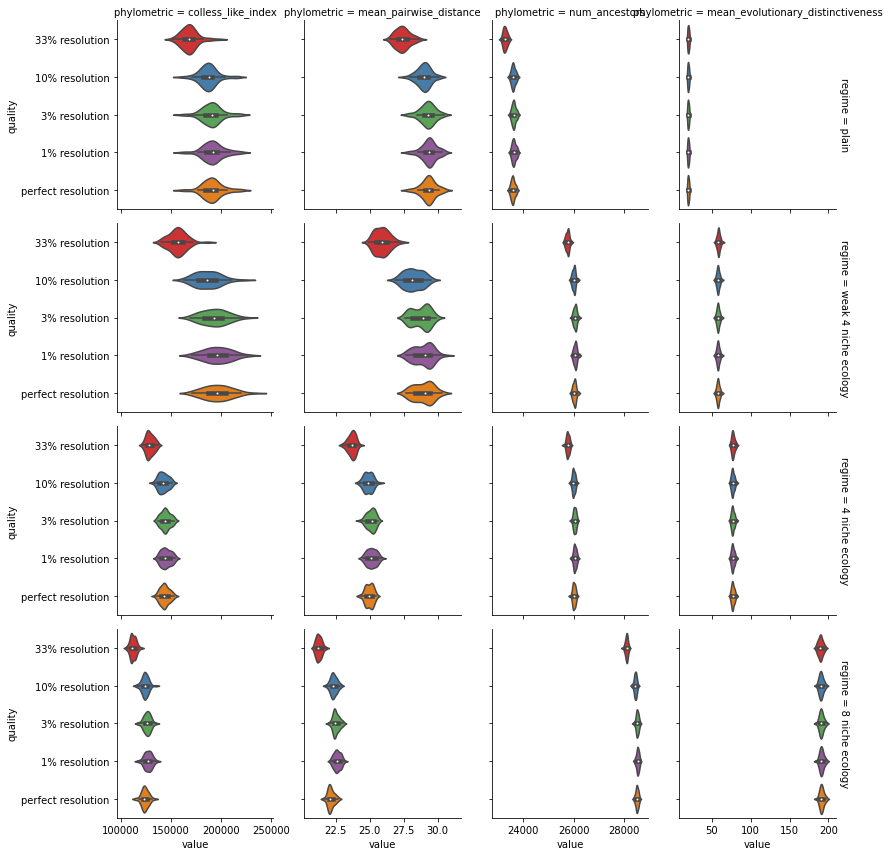

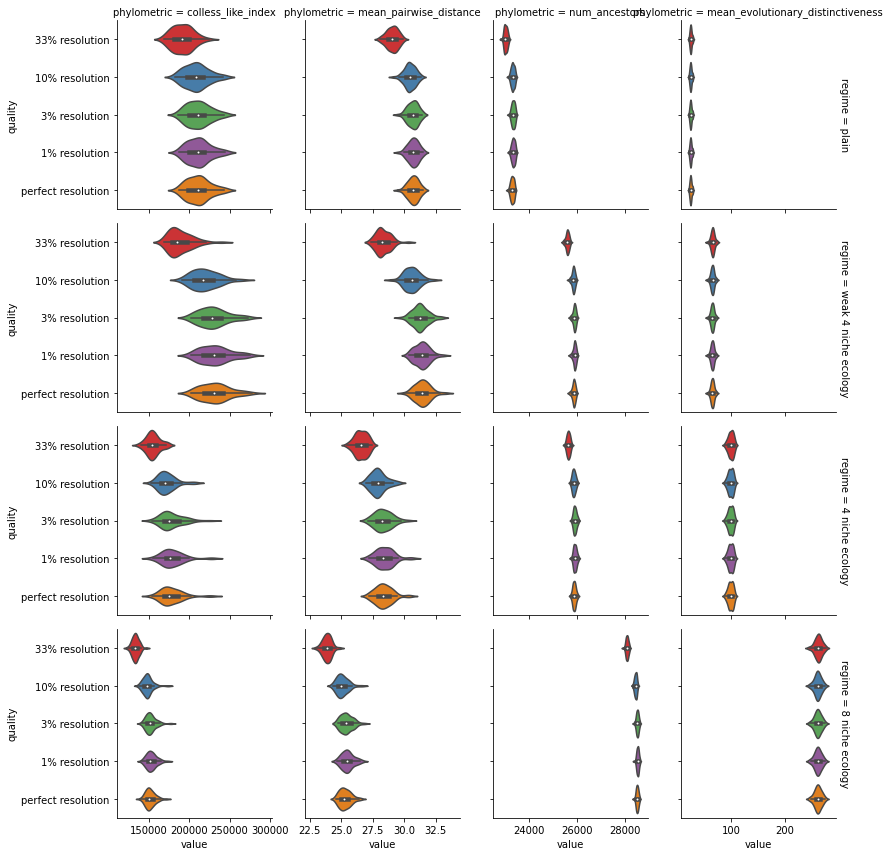

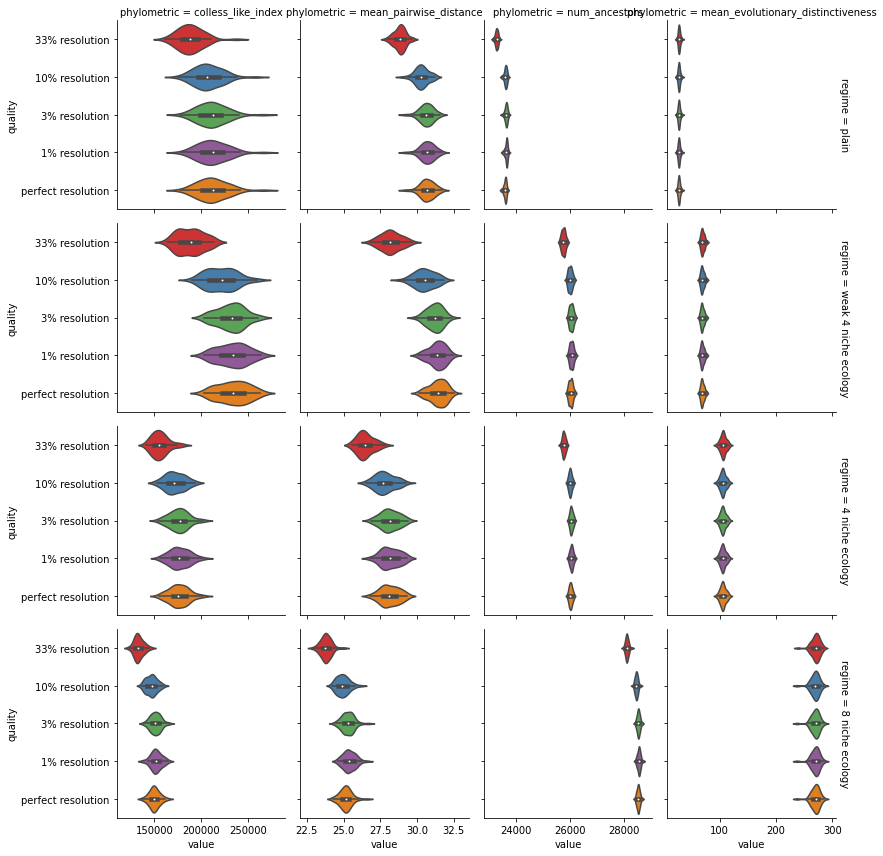

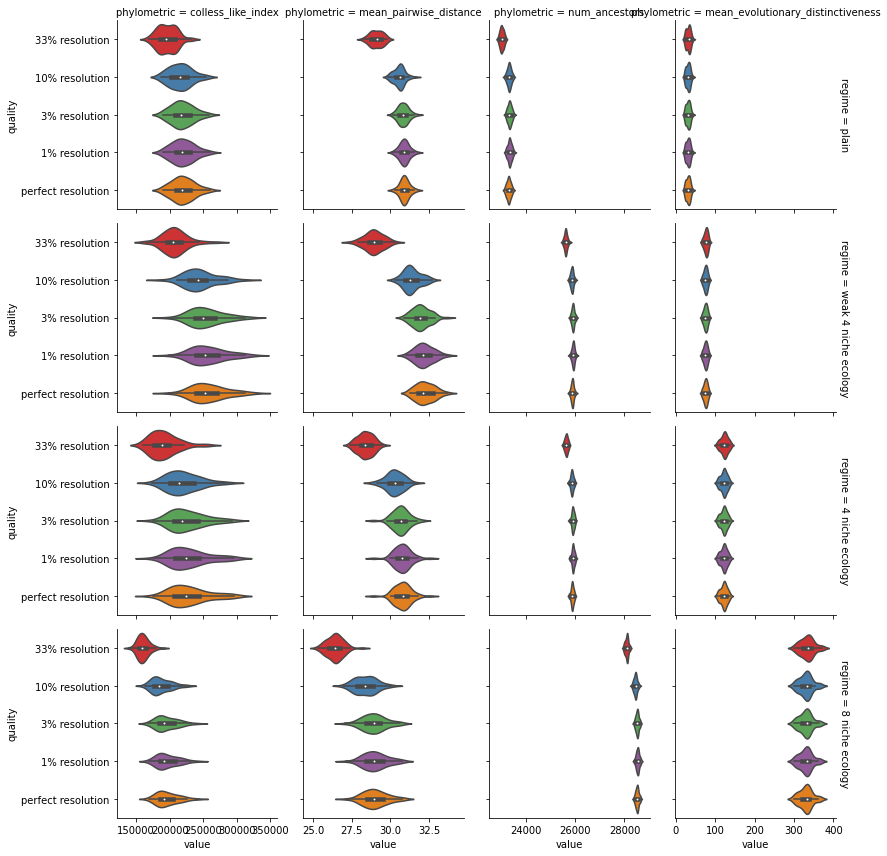

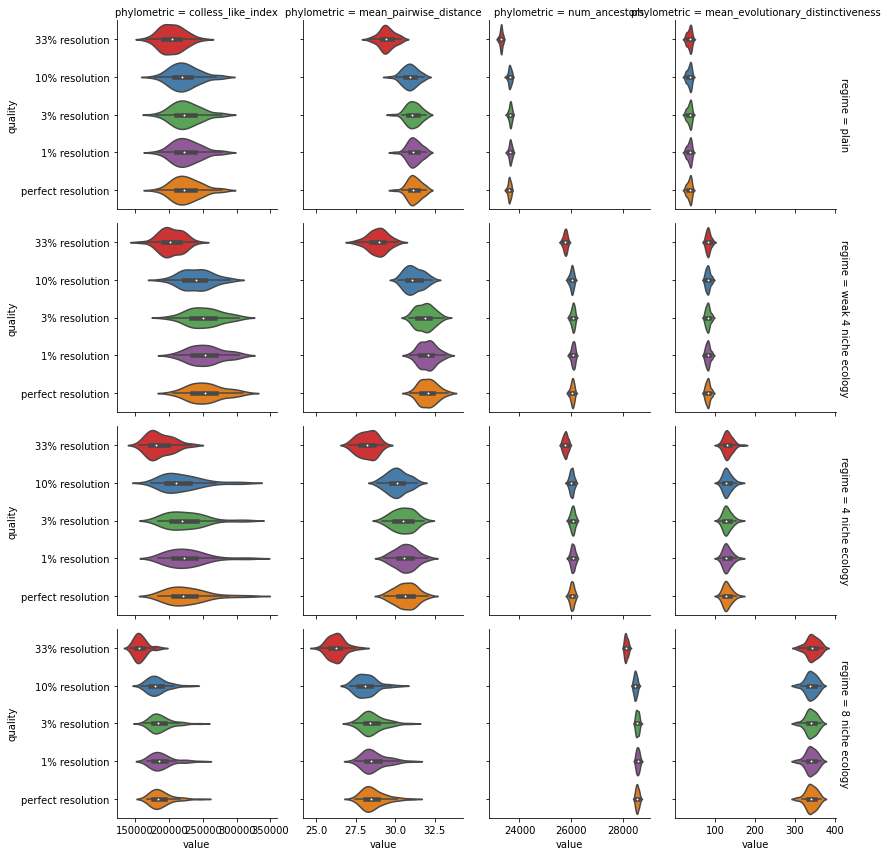

In [21]:
def make_do_plot(plotter):
    def do_plot(data, col, row, x, y):
        g = sns.FacetGrid(
            data,
            col=col,
            row=row,
            row_order=[
                "plain",
                "weak 4 niche ecology",
                "4 niche ecology",
                "8 niche ecology",
            ],
            sharex="col",
            margin_titles=True,
        )
        g.map(
            plotter,
            x,
            y,
            order=[
                "33% resolution",
                "10% resolution",
                "3% resolution",
                "1% resolution",
                "perfect resolution",
            ],
            palette=sns.color_palette("Set1", 5),
        )

    return do_plot


for viz, (group, group_df) in it.product(
    [
        sns.barplot,
        sns.boxplot,
        sns.violinplot,
    ],
    melted_df.groupby(sensitivity_analysis_variables),
):
    do_plot = make_do_plot(viz)
    do_plot.__name__ = viz.__name__
    tp.tee(
        do_plot,
        data=group_df,
        col="phylometric",
        row="regime",
        x="value",
        y="quality",
        teeplot_outattrs={
            **{
                "nuisance": "spatial-structure",
            },
            **dict(
                zip(sensitivity_analysis_variables, group),
            ),
        },
    )
